In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sns.set(style="whitegrid")

In [4]:
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

### Categorical plots

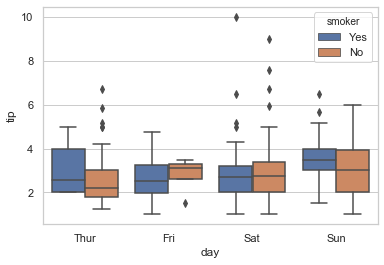

In [7]:
sns.boxplot(x="day",y="tip", data = tips, hue='smoker')

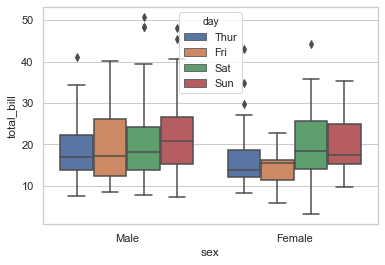

In [8]:
sns.boxplot(x="sex",y="total_bill",hue="day", data = tips)

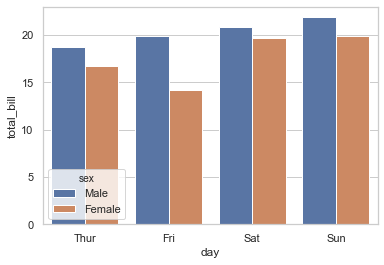

In [10]:
sns.barplot(x="day",y="total_bill", hue="sex", data = tips, ci=False)

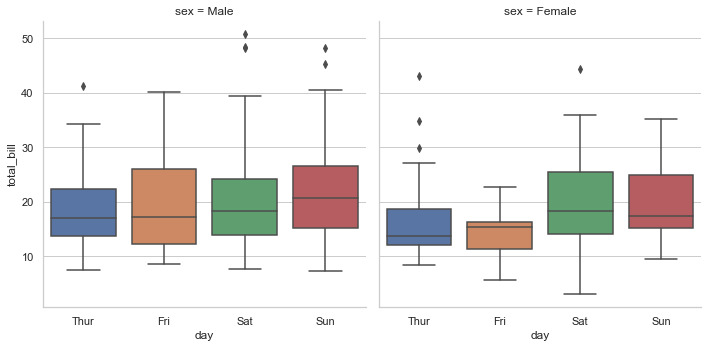

In [15]:
sns.catplot(x="day",y="total_bill",data=tips,col="sex", kind='box')

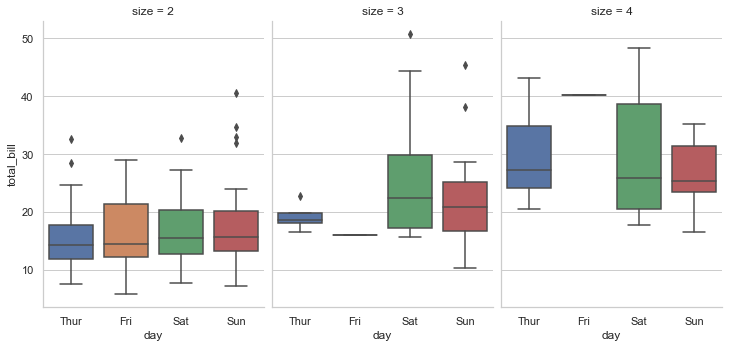

In [21]:
seltips = tips[tips['size'].isin([2,3,4])]
sns.catplot(x="day",y="total_bill",data=seltips,col="size", kind='box')
plt.gcf().set_size_inches(10,5)  # Change current figure size 

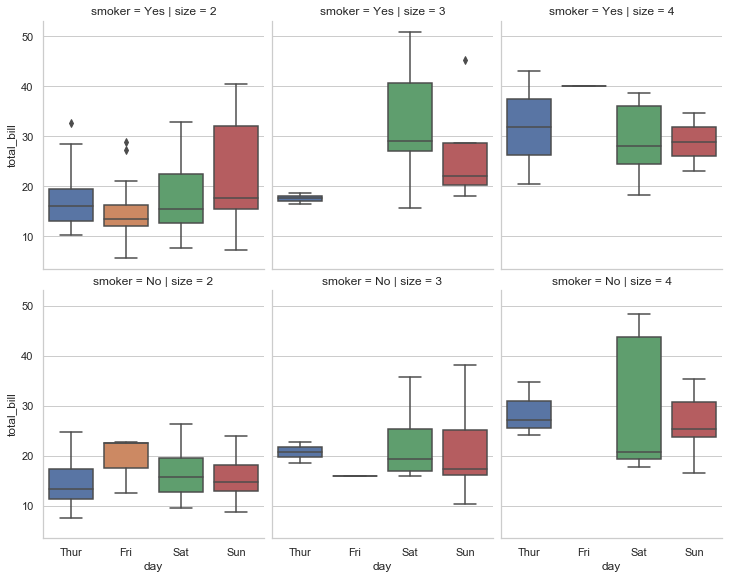

In [23]:
seltips = tips[tips['size'].isin([2,3,4])]
sns.catplot(x="day",y="total_bill",data=seltips,col="size", row="smoker", kind='box')
plt.gcf().set_size_inches(10,8)  # Change current figure size 

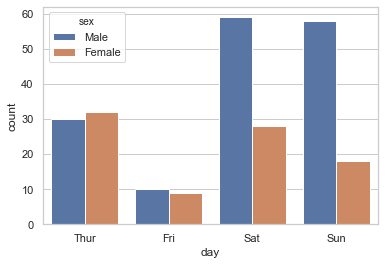

In [26]:
sns.countplot(x="day",hue ="sex", data=tips)

In [27]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [36]:
flights.groupby('month')['passengers'].sum()

month
January      2901
February     2820
March        3242
April        3205
May          3262
June         3740
July         4216
August       4213
September    3629
October      3199
November     2794
December     3142
Name: passengers, dtype: int64

March        12
February     12
January      12
December      0
November      0
October       0
September     0
August        0
July          0
June          0
May           0
April         0
Name: month, dtype: int64

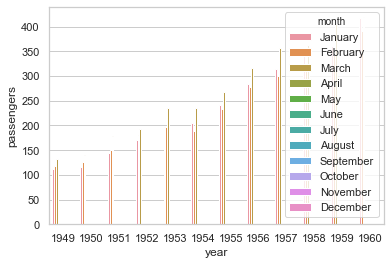

In [35]:
q1 = flights.loc[flights['month'].isin(['January','February','March'])]
sns.barplot(x="year",y="passengers",hue="month",data=q1,ci=False,estimator=np.sum)
q1.month.value_counts()

In [42]:
q1.dtypes

year             int64
month         category
passengers       int64
dtype: object

### Relational plots

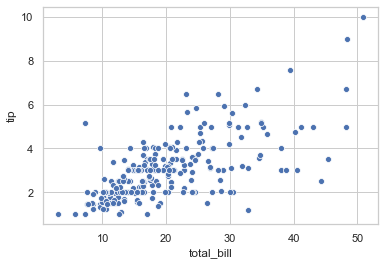

In [45]:
sns.scatterplot(x="total_bill",y="tip", data=tips)

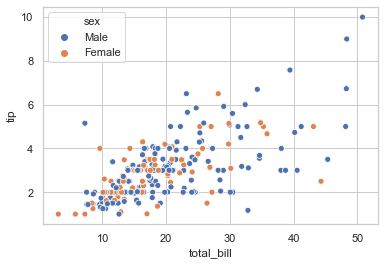

In [17]:
sns.scatterplot(x="total_bill",y="tip",hue="sex", data=tips)

In [51]:
fs = flights.groupby('month',as_index=False)['passengers'].sum()

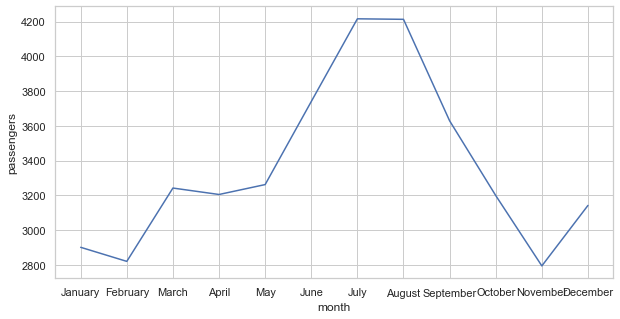

In [54]:
sns.lineplot(x=fs.month, y = fs.passengers)
plt.gcf().set_size_inches(10,5)

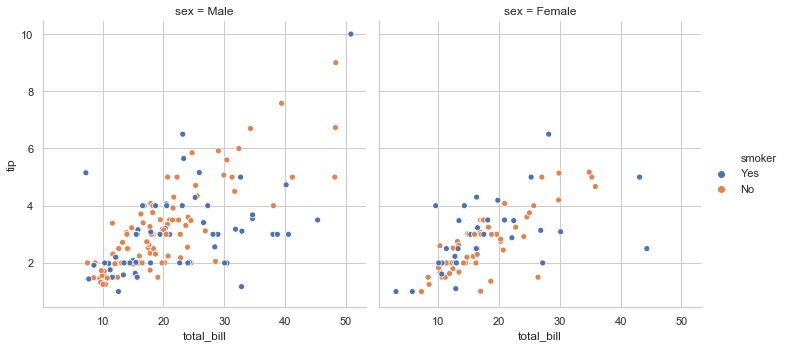

In [57]:
sns.relplot(x="total_bill",y="tip",col="sex", hue="smoker",data=tips)

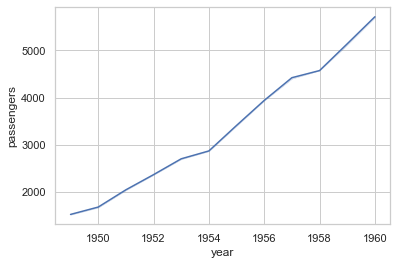

In [59]:
sns.lineplot(x="year",y="passengers",data=flights, estimator=np.sum, ci=False)

## Distribution plots

### pairplot

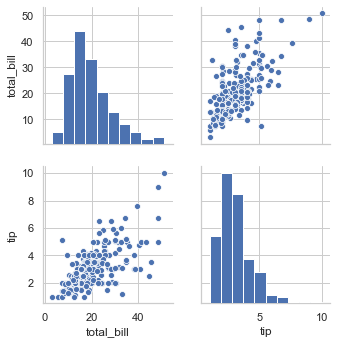

In [64]:
sns.pairplot(tips,vars=['total_bill','tip'], diag_kind='hist')
#plt.gcf().set_size_inches(8,8)

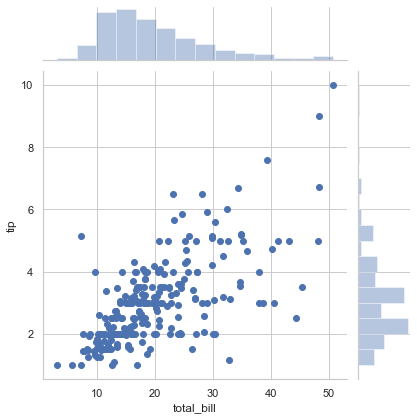

In [44]:
sns.jointplot(x='total_bill', y = 'tip', data = tips)

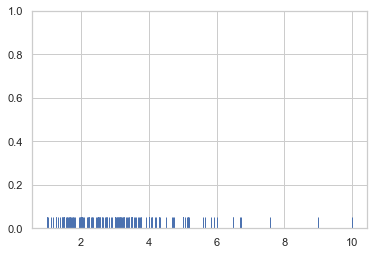

In [45]:
sns.rugplot(tips['tip'])

### Regression Plot

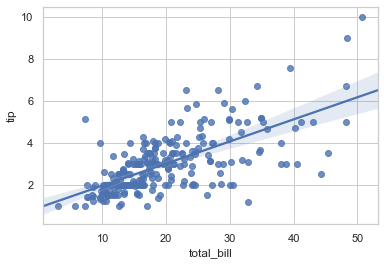

In [46]:
sns.regplot(x="total_bill",y='tip', data=tips)

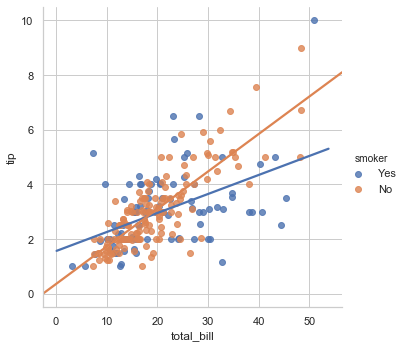

In [48]:
sns.lmplot(x="total_bill",y='tip',hue="smoker", data=tips,ci=False)

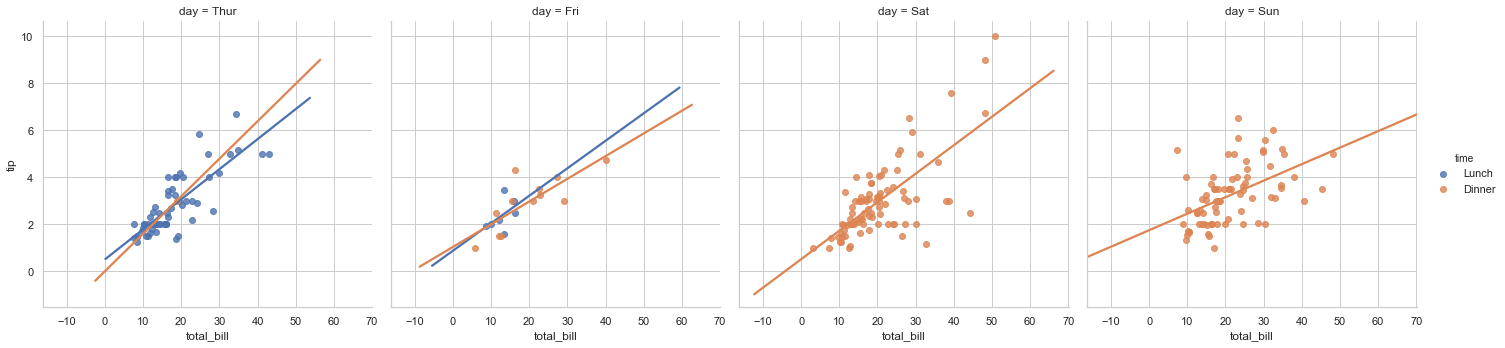

In [50]:
sns.lmplot(x="total_bill",y='tip',hue="time", col='day', data=tips,ci=False)

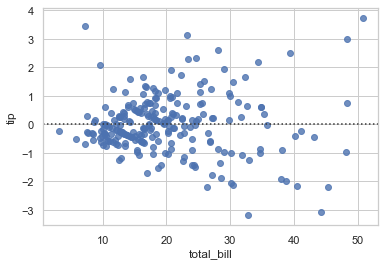

In [49]:
sns.residplot(x="total_bill",y='tip', data=tips)

### Matrix plots

### Admission

In [52]:
df = pd.read_csv('admission.csv')

In [53]:
df.head()

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


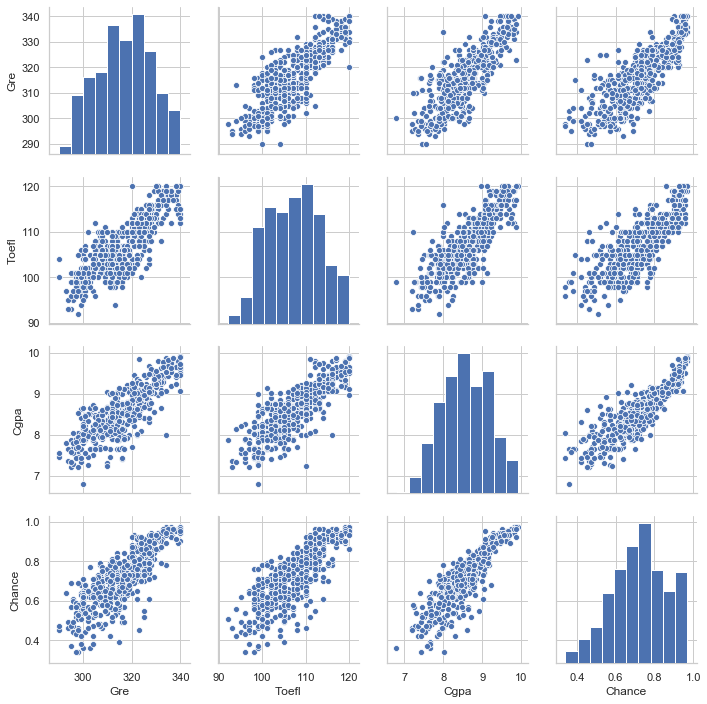

In [19]:
sns.pairplot(df, vars=['Gre','Toefl','Cgpa','Chance'])

In [56]:
cormat = df.loc[:,['Gre','Toefl','Cgpa','Chance']].corr()
cormat

,Gre,Toefl,Cgpa,Chance
Gre,1.000000,0.827200,0.825878,0.810351
Toefl,0.827200,1.000000,0.810574,0.792228
Cgpa,0.825878,0.810574,1.000000,0.882413
Chance,0.810351,0.792228,0.882413,1.000000


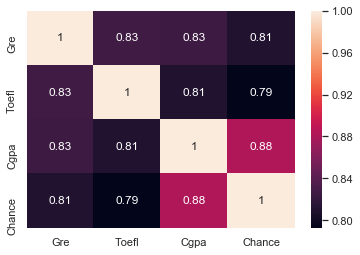

In [58]:
sns.heatmap(cormat, annot=True)

In [25]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


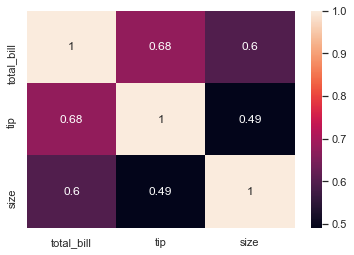

In [60]:
sns.heatmap(tips.corr(), annot=True)